# Chapter 14. Data Analysis Examples

***

## 14.1 1. USA.gov Data from Bitly

McKinney, Wes. Python for Data Analysis (p. 600). O'Reilly Media. Kindle Edition. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
folder='data_sets/'

with open(folder+'example.txt',mode='r') as fobj:
    print(fobj.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [3]:
import json

records=[json.loads(line) for line in open(folder+'example.txt',mode='r')]

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [5]:
timezones=[rec.get('tz',np.nan) for rec in records]

In [6]:
len(timezones)

3560

In [7]:
timezones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [8]:
timezones_SE=pd.Series(timezones).value_counts()

In [9]:
timezones_SE

America/New_York             1251
                              521
America/Chicago               400
America/Los_Angeles           382
America/Denver                191
                             ... 
Africa/Casablanca               1
America/Argentina/Cordoba       1
Australia/Queensland            1
Europe/Uzhgorod                 1
Asia/Nicosia                    1
Length: 97, dtype: int64

In [10]:
from collections import defaultdict 
def get_counts2(sequence):
    counts = defaultdict( int) # values will initialize to 0 
    for x in sequence:
        counts[x] += 1 
    return counts
get_counts2(timezones)

defaultdict(int,
            {'America/New_York': 1251,
             'America/Denver': 191,
             'America/Sao_Paulo': 33,
             'Europe/Warsaw': 16,
             '': 521,
             'America/Los_Angeles': 382,
             nan: 120,
             'Asia/Hong_Kong': 10,
             'Europe/Rome': 27,
             'Africa/Ceuta': 2,
             'Europe/Madrid': 35,
             'Asia/Kuala_Lumpur': 3,
             'Asia/Nicosia': 1,
             'Europe/London': 74,
             'Pacific/Honolulu': 36,
             'America/Chicago': 400,
             'Europe/Malta': 2,
             'Europe/Lisbon': 8,
             'Europe/Paris': 14,
             'Europe/Copenhagen': 5,
             'America/Mazatlan': 1,
             'Europe/Dublin': 3,
             'Europe/Brussels': 4,
             'America/Vancouver': 12,
             'Europe/Amsterdam': 22,
             'Europe/Prague': 10,
             'Europe/Stockholm': 14,
             'America/Anchorage': 5,
             'Asia

In [11]:
def get_counts( sequence):
    counts = {} 
    for x in sequence: 
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts


In [12]:
get_counts(timezones)

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 nan: 120,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Contine

In [13]:
def top_counts(count_dict,n=10):
    kv_pairs=sorted(count_dict.items(),key=lambda x:x[1],reverse=True)
    return kv_pairs[:10]

In [14]:
top_counts(get_counts2(timezones))

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 (nan, 120),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35)]

In [15]:
timezones_SE[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

In [16]:
from collections import Counter

counts_tz=Counter(timezones)

In [17]:
counts_tz.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 (nan, 120),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35)]

In [18]:
df=pd.DataFrame(records)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [20]:
tz_counts=df['tz'].value_counts()

In [21]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [22]:
clean_tz=df['tz'].fillna('Missing')
clean_tz[clean_tz=='']='Unknown'

In [23]:
tz_counts=clean_tz.value_counts()

In [24]:
tz_counts

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
America/Tegucigalpa       1
Europe/Sofia              1
America/Costa_Rica        1
Africa/Casablanca         1
Asia/Yekaterinburg        1
Name: tz, Length: 98, dtype: int64

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


In [26]:
subset=tz_counts[:10]

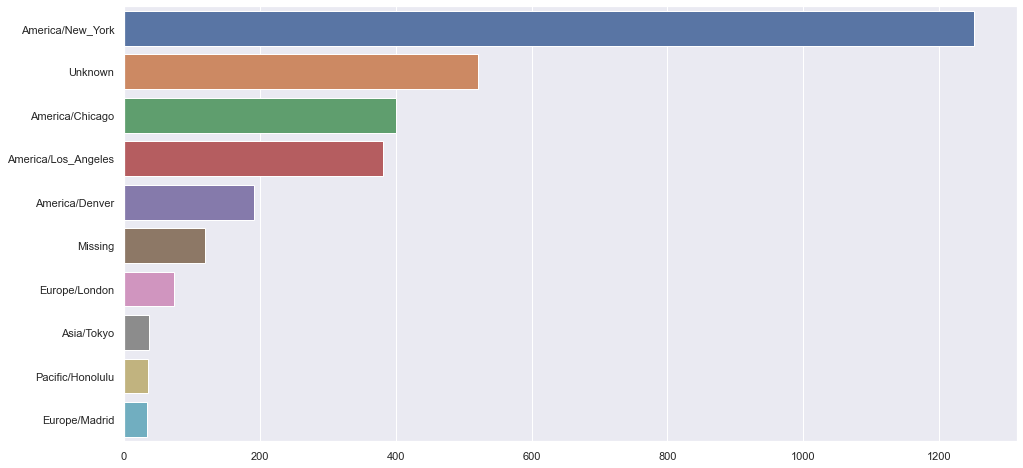

In [27]:
plt.figure(figsize=(16,8))
sns.barplot(x=subset.values,y=subset.index)

In [28]:
# browser agent
df['a'][0]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [29]:
df['a'][25]

'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [30]:
df['a'][[1,50,51]]

1                                GoogleMaps/RochesterNY
50    Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/...
51    Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; L...
Name: a, dtype: object

In [31]:
results=pd.Series(a_str.split()[0] for a_str in df['a'].dropna())

In [32]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [33]:
results.value_counts().head(10)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [34]:
cframe=df[~df['a'].isnull()]

In [35]:
df['a'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3555    False
3556    False
3557    False
3558    False
3559    False
Name: a, Length: 3560, dtype: bool

In [36]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
cframe

<ipython-input-36-46f26b8f63e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')


,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN,Windows
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN,Not Windows


In [37]:
by_os_tz=cframe.groupby(['tz','os'])

In [38]:
by_os_tz.size()

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [39]:
agg_counts = by_os_tz.size().unstack().fillna(0)
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [40]:
indexer=agg_counts.sum(1).argsort()
indexer

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [41]:
count_subset=agg_counts.take(indexer[-10:])

In [42]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [43]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [44]:
count_subset=count_subset.stack()

In [45]:
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

In [46]:
count_subset.name='total'

In [47]:
count_subset[:10]

tz                 os         
America/Sao_Paulo  Not Windows    13.0
                   Windows        20.0
Europe/Madrid      Not Windows    16.0
                   Windows        19.0
Pacific/Honolulu   Not Windows     0.0
                   Windows        36.0
Asia/Tokyo         Not Windows     2.0
                   Windows        35.0
Europe/London      Not Windows    43.0
                   Windows        31.0
Name: total, dtype: float64

In [48]:
count_subset.index.get_level_values('tz').values

array(['America/Sao_Paulo', 'America/Sao_Paulo', 'Europe/Madrid',
       'Europe/Madrid', 'Pacific/Honolulu', 'Pacific/Honolulu',
       'Asia/Tokyo', 'Asia/Tokyo', 'Europe/London', 'Europe/London',
       'America/Denver', 'America/Denver', 'America/Los_Angeles',
       'America/Los_Angeles', 'America/Chicago', 'America/Chicago', '',
       '', 'America/New_York', 'America/New_York'], dtype=object)

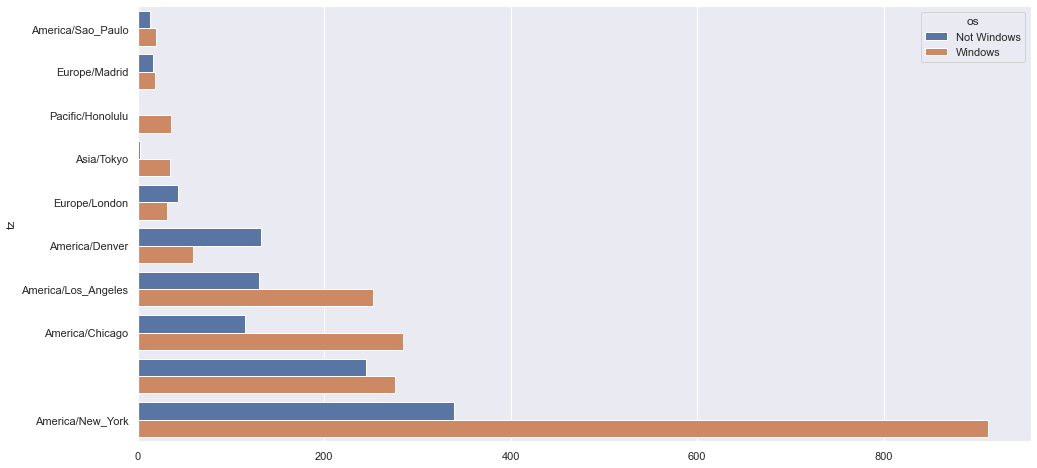

In [49]:
plt.figure(figsize=(16,8))
ax=sns.barplot(x=count_subset.values,
            y=count_subset.index.get_level_values('tz'),
            hue=count_subset.index.get_level_values('os'))


In [50]:
def norm_group(group):
    group['normed_total']=group['total']/group['total'].sum()
    return group
    

In [51]:
count_subset.shape

(20,)

In [52]:
count_subset=count_subset.reset_index()

In [53]:
count_subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


In [54]:
results=count_subset.groupby('tz').apply(norm_group)

In [55]:
results

,tz,os,total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946
8,Europe/London,Not Windows,43.0,0.581081
9,Europe/London,Windows,31.0,0.418919


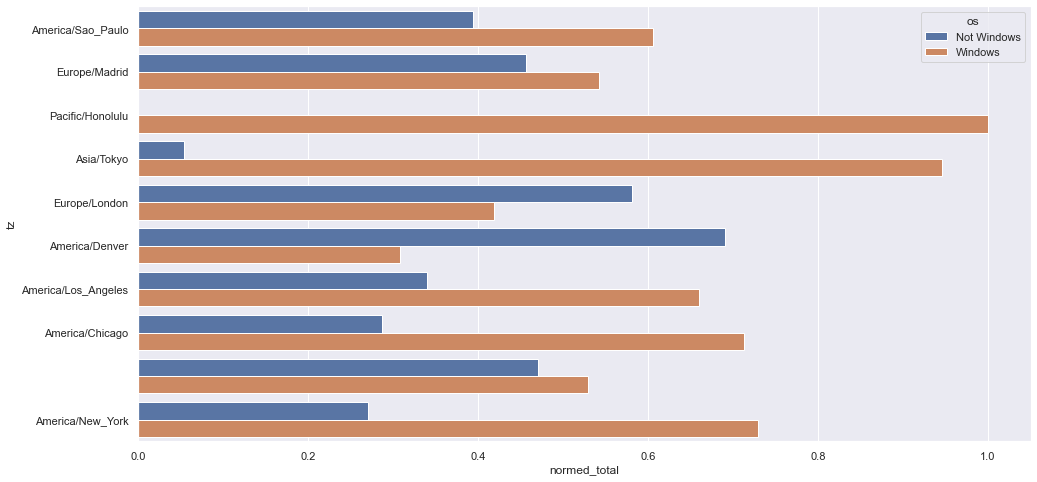

In [56]:
plt.figure(figsize=(16,8))
sns.barplot(x='normed_total',
            y='tz',
            hue='os',
            data=results)

In [57]:
g=count_subset.groupby('tz')


In [58]:
[grp for k,grp in g] #  groups

[   tz           os  total
 16     Not Windows  245.0
 17         Windows  276.0,
                  tz           os  total
 14  America/Chicago  Not Windows  115.0
 15  America/Chicago      Windows  285.0,
                 tz           os  total
 10  America/Denver  Not Windows  132.0
 11  America/Denver      Windows   59.0,
                      tz           os  total
 12  America/Los_Angeles  Not Windows  130.0
 13  America/Los_Angeles      Windows  252.0,
                   tz           os  total
 18  America/New_York  Not Windows  339.0
 19  America/New_York      Windows  912.0,
                   tz           os  total
 0  America/Sao_Paulo  Not Windows   13.0
 1  America/Sao_Paulo      Windows   20.0,
            tz           os  total
 6  Asia/Tokyo  Not Windows    2.0
 7  Asia/Tokyo      Windows   35.0,
               tz           os  total
 8  Europe/London  Not Windows   43.0
 9  Europe/London      Windows   31.0,
               tz           os  total
 2  Europe/Madrid  Not W

In [59]:
g.total.sum()

tz
                        521.0
America/Chicago         400.0
America/Denver          191.0
America/Los_Angeles     382.0
America/New_York       1251.0
America/Sao_Paulo        33.0
Asia/Tokyo               37.0
Europe/London            74.0
Europe/Madrid            35.0
Pacific/Honolulu         36.0
Name: total, dtype: float64

In [60]:
g.total.transform('sum')

0       33.0
1       33.0
2       35.0
3       35.0
4       36.0
5       36.0
6       37.0
7       37.0
8       74.0
9       74.0
10     191.0
11     191.0
12     382.0
13     382.0
14     400.0
15     400.0
16     521.0
17     521.0
18    1251.0
19    1251.0
Name: total, dtype: float64

In [61]:
results2=count_subset['total']/g.total.transform('sum')

In [62]:
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64

# 14.2 MovieLens 1M Dataset

In [63]:
pd.options.display.max_rows=10

In [64]:
unames=['user_id','gender','age','occupation','zip']
df_users=pd.read_table('data_sets/movielens/users.dat',header=None,names=unames,sep='::')
df_users.head()

<ipython-input-64-3955b3554551>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_users=pd.read_table('data_sets/movielens/users.dat',header=None,names=unames,sep='::')


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [65]:
rnames=['user_id','movie_id','rating','timestamp']
df_ratings=pd.read_table('data_sets/movielens/ratings.dat',sep='::',header=None,engine='python',names=rnames)
df_ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [66]:
mnames=['movie_id','title','genres']
df_movies=pd.read_table('data_sets/movielens/movies.dat',sep='::',header=None,engine='python',names=mnames)
df_movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [67]:
df_movie_lens=pd.merge(pd.merge(df_ratings,df_users),df_movies)
df_movie_lens.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [68]:
df_movie_lens.shape

(1000209, 10)

In [69]:
mean_ratings=df_movie_lens.pivot_table('rating',index='title',columns='gender',aggfunc='mean')

In [70]:
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [71]:
ratings_by_title=df_movie_lens.groupby('title').size() # size of group object
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [72]:
active_titles = ratings_by_title.index[ ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [73]:
mean_ratings=mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [74]:
top_female_ratings = mean_ratings.sort_values( by ='F', ascending = False)

top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [75]:
top_male_ratings = mean_ratings.sort_values( by ='M', ascending = False)

top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


# Measuring Rating Disagreement

In [76]:
mean_ratings['diff']=mean_ratings['M']-mean_ratings['F']

sorted_by_diff=mean_ratings.sort_values('diff')

In [77]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [78]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [79]:
ratings_by_title=df_movie_lens.groupby('title')['rating'].std()
ratings_by_title

title
$1,000,000 Duck (1971)                        1.092563
'Night Mother (1986)                          1.118636
'Til There Was You (1997)                     1.020159
'burbs, The (1989)                            1.107760
...And Justice for All (1979)                 0.878110
                                                ...   
Zed & Two Noughts, A (1985)                   1.052794
Zero Effect (1998)                            1.042932
Zero Kelvin (Kjærlighetens kjøtere) (1995)    0.707107
Zeus and Roxanne (1997)                       1.122884
eXistenZ (1999)                               1.178568
Name: rating, Length: 3706, dtype: float64

In [80]:
rating_std_by_active=ratings_by_title.loc[active_titles]
rating_std_by_active.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# 14.3 US Baby Names 1880– 2010


In [81]:
with open('data_sets/babynames/yob1880.txt') as myfile:
#     print(myfile.readlines()[:5])
    for line in myfile.readlines()[:5]:
        print(line)

Mary,F,7065

Anna,F,2604

Emma,F,2003

Elizabeth,F,1939

Minnie,F,1746



In [82]:
years=range(1880,2011)
columns=['name','sex','births']
pieces=[]

for year in years:
    path=f'data_sets/babynames/yob{year}.txt'
    tmp_frame=pd.read_csv(path,names=columns)
    
    tmp_frame['year']=year
    pieces.append(tmp_frame)

df_names=pd.concat(pieces,ignore_index=True)
    

In [83]:
df_names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [84]:
total_births=df_names.pivot_table('births',index='year',columns='sex',aggfunc='sum')

In [85]:
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


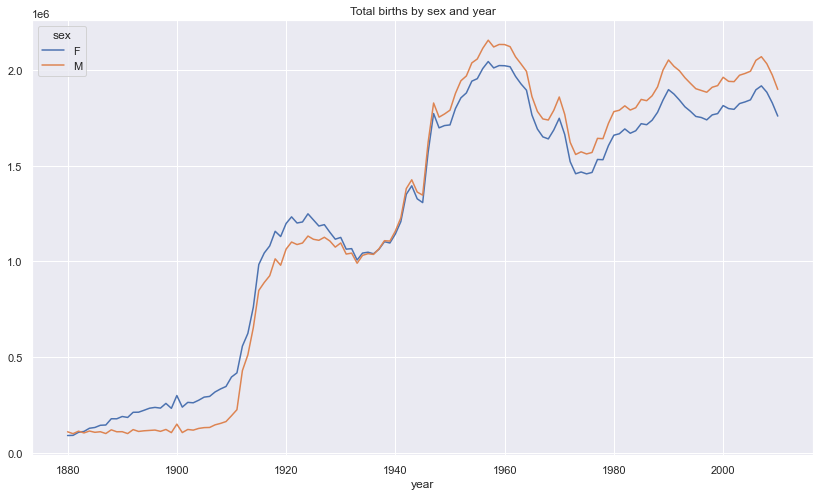

In [86]:

total_births.plot(title='Total births by sex and year',figsize=(14,8))

In [87]:
def add_prop(grp):
    grp['prop']=grp['births']/ grp['births'].sum()   
    return grp

In [88]:
df_names=df_names.groupby(['year','sex']).apply(add_prop)

In [89]:
df_names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [90]:
df_names.groupby(['year','sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [91]:
def get_top_n(group,n=1000):
    return group.sort_values('births',ascending=False)[:n]

grouped=df_names.groupby(['year','sex'])

top1000=grouped.apply(get_top_n)

In [92]:
top1000.reset_index(inplace=True,drop=True)

In [93]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


## Analyzing Naming Trends

McKinney, Wes. Python for Data Analysis (p. 632). O'Reilly Media. Kindle Edition. 

In [94]:
boys=top1000[top1000['sex']=='M']
girls=top1000[top1000['sex']=='F']

In [95]:
total_births=top1000.pivot_table('births',index='year',columns='name',aggfunc='sum')

In [96]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F901E7A5E0>,
      dtype=object)

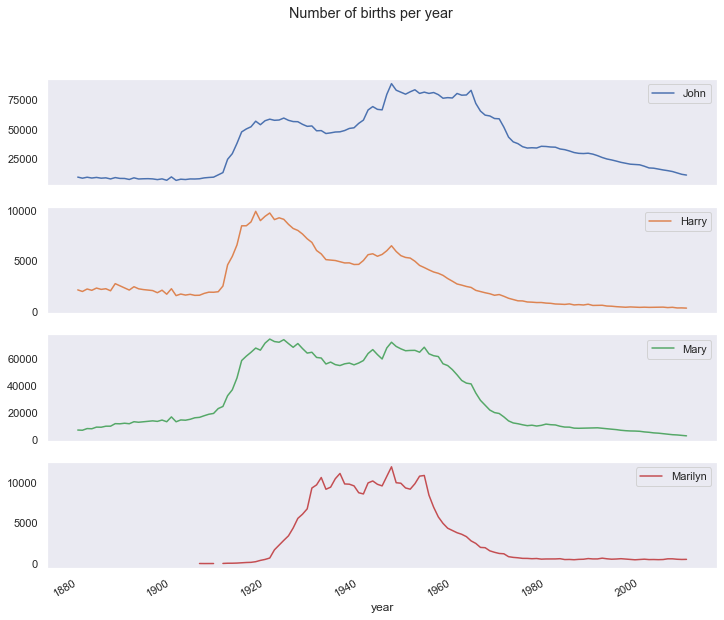

In [98]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot( subplots = True,
            figsize =( 12, 10),
            grid = False, title ="Number of births per year")


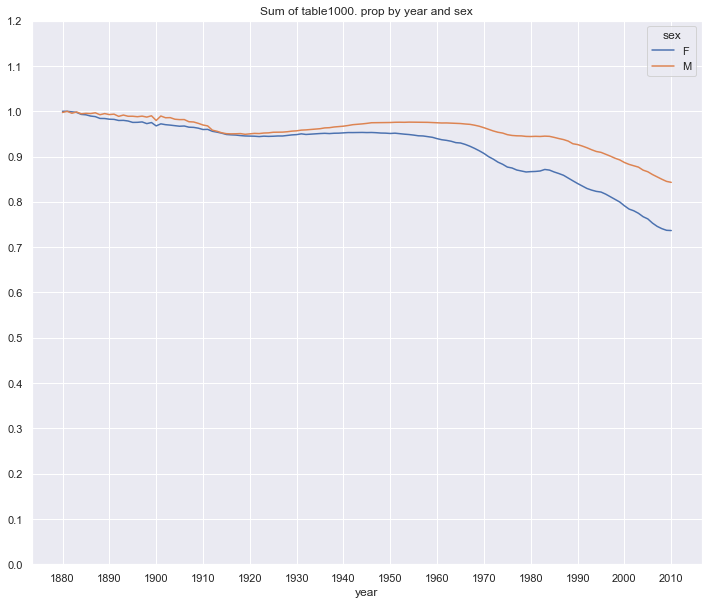

In [99]:
# Measuring the increase in naming diversity

table = top1000. pivot_table('prop', index ='year', columns ='sex', aggfunc ='sum')
table.plot( title ='Sum of table1000. prop by year and sex', 
           yticks = np.linspace( 0, 1.2, 13),
           figsize =( 12, 10),
           xticks = range( 1880, 2020, 10))


In [100]:
df=boys[boys.year==2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [101]:
prop_cumsum = df.sort_values(by ='prop', ascending = False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [102]:
prop_cumsum.values.searchsorted(0.5)

116

In [103]:
df=boys[boys.year==1900]
in1900=df.sort_values(by ='prop', ascending = False).prop.cumsum()
in1900

40877    0.065319
40878    0.122308
40879    0.170437
40880    0.206338
40881    0.233584
           ...   
41848    0.979489
41847    0.979542
41846    0.979595
41845    0.979648
41876    0.979702
Name: prop, Length: 1000, dtype: float64

In [104]:
# how many of the most popular names it takes to reach 50%.
in1900.values.searchsorted(0.5)+1

25

In [105]:
def get_quantile_count(group,q=.5):
    group=group.sort_values('prop',ascending=False)
    
    return group.prop.cumsum().values.searchsorted(q)+1

In [106]:
diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')

In [107]:
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


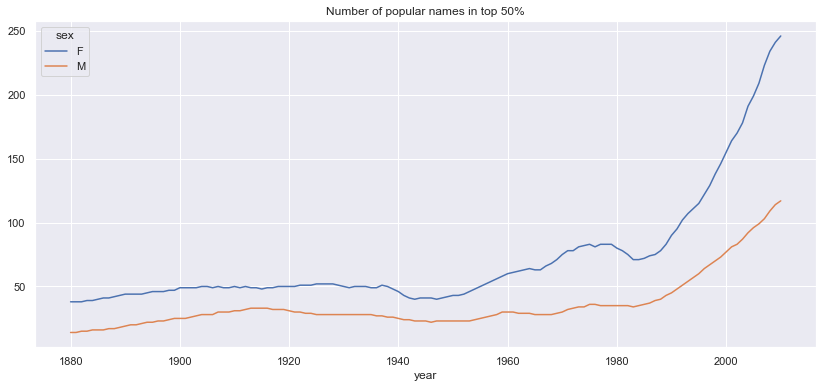

In [108]:
diversity.plot( title ="Number of popular names in top 50%",figsize=(14,6))


### The “last letter” revolution


In [109]:
# extract last letter from name column 
get_last_letter = lambda x: x[-1] 
last_letters = df_names.name.map(get_last_letter) 
last_letters.name = 'last_letter' 
table = df_names.pivot_table( 'births', index = last_letters, columns =['sex', 'year'], aggfunc =sum)

table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
...              ...      ...      ...  ...       ...       ...       ...   
v                NaN      NaN      NaN  ...    1209.0    1332.0    1652.0   
w                NaN      NaN      NaN  ...   52265.0   50103.0   49079.0   
x                NaN      NaN      NaN  ...   10691.0   11009.0   11718.0   
y            14980.0  17931.0  17601.0  ...  139109.0  134557.0  130569.0   
z              188.0    238.0    277.0  ...    2840.0    2737.0    2722.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   
...               ...       ...       ...       ...       ...       ...   
v              1823.0    1794.0    2010.0    2295.0    2418.0    2589.0   
w             47556.0   45464.0   43217.0   40251.0   36937.0   33181.0   
x             12399.0   13025.0   13992.0   14306.0   14834.0   16640.0   
y            128367.0  125190.0  123707.0  123397.0  122633.0  112922.0   
z              2710.0    2903.0    3086.0    3301.0    3473.0    3633.0   

sex                    
year             2010  
last_letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  
...               ...  
v              2723.0  
w             30656.0  
x             16352.0  
y            110425.0  
z              3476.0  

[26 rows x 262 columns]

In [110]:
sub_table=table.reindex(columns=[1910,1960,2010],level='year')
sub_table

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
...               ...       ...       ...      ...       ...       ...
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

[26 rows x 6 columns]

In [111]:
sub_table.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [112]:
letter_prop=sub_table/sub_table.sum()

In [113]:
letter_prop # proportions

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

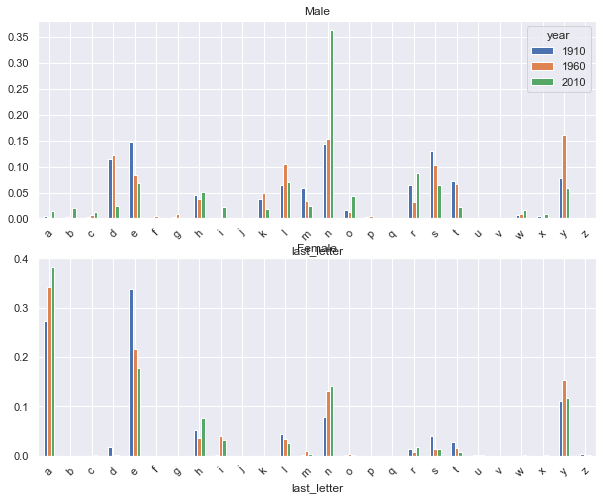

In [114]:
fig, axes = plt.subplots( 2, 1, figsize =( 10, 8)) 
letter_prop['M']. plot( kind ='bar', rot = 45, ax = axes[ 0], title ='Male')
letter_prop['F']. plot( kind ='bar', rot = 45, ax = axes[ 1], title ='Female',legend=False)

In [115]:
sub_table

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
...               ...       ...       ...      ...       ...       ...
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

[26 rows x 6 columns]

In [122]:
letter_prop=table/table.sum()
letter_prop

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345587  0.343440  0.338764  0.341251  0.338550  0.341270   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007211  0.007100  0.006478   
e            0.366819  0.370616  0.374582  0.373159  0.372722  0.372896   
...               ...       ...       ...       ...       ...       ...   
v                 NaN       NaN       NaN       NaN       NaN       NaN   
w                 NaN  0.000054       NaN       NaN       NaN       NaN   
x                 NaN       NaN       NaN  0.000062       NaN       NaN   
y            0.115053  0.113142  0.112609  0.107397  0.107866  0.104670   
z            0.001165  0.001033  0.000983  0.001255  0.001147  0.001127   

sex                                                  ...         M            \
year             1886      1887      1888      1889  ...      2001      2002   
last_letter                                          ...                       
a            0.339703  0.335258  0.332764  0.328706  ...  0.020162  0.020019   
b                 NaN       NaN       NaN       NaN  ...  0.026256  0.025418   
c                 NaN       NaN       NaN       NaN  ...  0.013972  0.014048   
d            0.006967  0.007035  0.007266  0.007703  ...  0.031352  0.028794   
e            0.372802  0.372324  0.373675  0.373736  ...  0.074927  0.074603   
...               ...       ...       ...       ...  ...       ...       ...   
v                 NaN       NaN       NaN       NaN  ...  0.000623  0.000687   
w            0.000035       NaN       NaN       NaN  ...  0.026934  0.025840   
x                 NaN       NaN       NaN       NaN  ...  0.005509  0.005678   
y            0.103336  0.102615  0.100380  0.098677  ...  0.071687  0.069397   
z            0.001398  0.001288  0.001332  0.001553  ...  0.001464  0.001412   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a            0.019177  0.019505  0.018481  0.017635  0.016747  0.016189   
b            0.024368  0.023171  0.021645  0.020778  0.020357  0.019655   
c            0.014042  0.013514  0.013083  0.012991  0.012983  0.012458   
d            0.027069  0.026118  0.025420  0.025075  0.024451  0.023574   
e            0.073396  0.071710  0.070799  0.069748  0.069445  0.069362   
...               ...       ...       ...       ...       ...       ...   
v            0.000838  0.000920  0.000900  0.000980  0.001109  0.001190   
w            0.024882  0.023999  0.022809  0.021079  0.019452  0.018175   
x            0.005941  0.006257  0.006534  0.006825  0.006914  0.007299   
y            0.066197  0.064781  0.062806  0.060338  0.059634  0.060342   
z            0.001380  0.001368  0.001456  0.001505  0.001595  0.001709   

sex                              
year             2009      2010  
last_letter                      
a            0.015927  0.014980  
b            0.019693  0.020470  
c            0.012186  0.012181  
d            0.023398  0.023387  
e            0.068663  0.067959  
...               ...       ...  
v            0.001312  0.001434  
w            0.016814  0.016148  
x            0.008432  0.008614  
y            0.057223  0.058168  
z            0.001841  0.001831  

[26 rows x 262 columns]

In [126]:
dns_ts=letter_prop.loc[['d','n','y'],'M'].T
dns_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


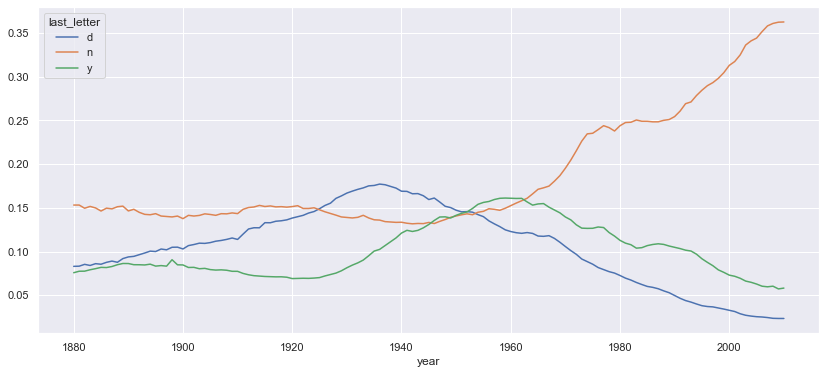

In [128]:
dns_ts.plot(figsize=(14,6))

# Boy names that became girl names (and vice versa)

> McKinney, Wes. Python for Data Analysis (p. 644). O'Reilly Media. Kindle Edition. 

In [130]:
all_names=pd.Series(top1000.name.unique())
all_names.shape

(6868,)

In [131]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [132]:
filtered = top1000[ top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()


name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [133]:
table = filtered.pivot_table('births', index ='year', 
                             columns ='sex', aggfunc ='sum')
table=table.div(table.sum(1),axis=0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


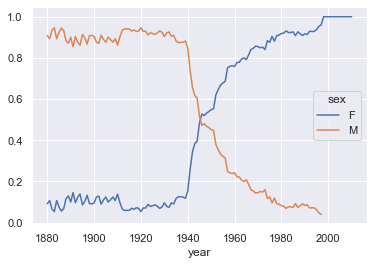

In [135]:
table.plot()


# 14.4 USDA Food Database

> McKinney, Wes. Python for Data Analysis (p. 647). O'Reilly Media. Kindle Edition. 